In [38]:
from os import listdir
from os.path import isdir, join
import os
import glob, re
import random
import numpy as np
import matplotlib.pyplot as plt


In [39]:
dataset_path = os.getcwd() + "\\DataSet\\"
for name in listdir(dataset_path):
        if isdir(join(dataset_path, name)):
            print(name)

Azimuth
Doppler


In [40]:
# Create a dictionnary for each input type, store them in a list
type_list = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(type_list)

i = 0

for type in type_list:
    type_dict = {}
    type_dict["type input"] = type
    class_list = [name for name in listdir(join(dataset_path,type)) if isdir(join(dataset_path, type))]
    type_dict["classes"] = class_list
    print (type_dict)
    type_list[i] = type_dict
    i += 1
print(type_list)


['Azimuth', 'Doppler']
{'type input': 'Azimuth', 'classes': ['idle', 'object_moved']}
{'type input': 'Doppler', 'classes': ['idle', 'presence']}
[{'type input': 'Azimuth', 'classes': ['idle', 'object_moved']}, {'type input': 'Doppler', 'classes': ['idle', 'presence']}]


In [41]:
# See how many files are in each
num_samples=0
for type in type_list:
        print("input type dictionnary", type)
        for target in type["classes"]:
                print(target)
                print(len(listdir(join(dataset_path, type["type input"], target))))
                num_samples += len(listdir(join(dataset_path, type["type input"], target)))
        print('Total samples:', num_samples)

input type dictionnary {'type input': 'Azimuth', 'classes': ['idle', 'object_moved']}
idle
150
object_moved
55
Total samples: 205
input type dictionnary {'type input': 'Doppler', 'classes': ['idle', 'presence']}
idle
155
presence
150
Total samples: 510


In [42]:
# Settings
perc_keep_samples = 1.0 # 1.0 is keep all samples
val_ratio = 0.15
test_ratio = 0.15 


In [43]:
# Depth for the 3D CNN (range doppler)
DEPTH = 4

In [44]:
# Return float from csv file
def atof(text):
    try:
        retval = float(text)
    except ValueError:
        retval = text
    return retval

# Split the initial string in separated float substrings
def natural_keys(text):
    return [ atof(c) for c in re.split(r'[+-]?([0-9]+(?:[.][0-9]*)?|[.][0-9]+)', text) ]

In [45]:
filenames_dict = {}
y_dict = {}

for type in type_list:
    print(type)
    # Initialize vars
    files = []
    y = []

    if type["type input"] == 'Doppler':
        filenames = []
        # Keep only a depth multiple number of files to analyze for 3D CNN
        for index, target in enumerate(type["classes"]):
            print('index',index,',target:',target)
            idx = []
            i_f = [[],[]]
            fln = [[],[]]
            files = glob.glob(dataset_path + type["type input"] + "\\" + target + "/*.csv")
            x = len(files)
            if (x % DEPTH) != 0:
                dif = x % DEPTH
                files = files[:x-dif] 

            dat = ""
            fc = 0
            for i, f in enumerate(files):
                #print('i:',i,',f:',f)
                if i == 0:
                    dat = f.split('_')[-7] + f.split('_')[-6] + f.split('_')[-5] + f.split('_')[-4] + f.split('_')[-3]
                    fln[fc].append(f)
                    fl = f.split('_')[-1]
                    i_f[fc].append(int(fl.split('.')[0]))
                else:
                    if dat == (f.split('_')[-7] + f.split('_')[-6] + f.split('_')[-5] + f.split('_')[-4] + f.split('_')[-3]):
                        fln[fc].append(f)
                        fl = f.split('_')[-1]
                        i_f[fc].append(int(fl.split('.')[0]))
                    else:
                        fc += 1
                        dat = f.split('_')[-7] + f.split('_')[-6] + f.split('_')[-5] + f.split('_')[-4] + f.split('_')[-3]
                        fln[fc].append(f)
                        fl = f.split('_')[-1]
                        i_f[fc].append(int(fl.split('.')[0]))

            for x in i_f:
                idx.append(np.argsort(np.array(x)))


            for w, z in enumerate(idx):
                for i in range(0, len(z)-3):
                    if len(z) > 4:
                        aux = []
                        aux.append(fln[w][z[i]])
                        aux.append(fln[w][z[i+1]])
                        aux.append(fln[w][z[i+2]])
                        aux.append(fln[w][z[i+3]])
                        filenames.append(aux)
                        y.append(index)

    else:
    # Keep all files for 2D CNN
        filenames = []
        for index, target in enumerate(type["classes"]):
            print('index',index,',target:',target)
            idx = []
            i_f = [[],[]]
            fln = [[],[]]
            files = glob.glob(dataset_path + type["type input"] + "\\" + target + "/*.csv")
            for i, f in enumerate(files):
                y.append(index)
            filenames+=files

    y_dict[type['type input']] = y
    filenames_dict[type['type input']] = filenames
    print('N for type',type['type input'],":",len(filenames),filenames)
    print('filenames:',filenames_dict[type['type input']])
    print("y:",y)

print("Results for all input types :")
print("y_dict:",y_dict)
print("filenames_dict:",filenames_dict)

{'type input': 'Azimuth', 'classes': ['idle', 'object_moved']}
index 0 ,target: idle
index 1 ,target: object_moved
N for type Azimuth : 205 ['c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Azimuth\\idle\\2024_6_25_11_52_4_idle_0.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Azimuth\\idle\\2024_6_25_11_52_4_idle_1.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Azimuth\\idle\\2024_6_25_11_52_4_idle_10.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Azimuth\\idle\\2024_6_25_11_52_4_idle_100.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Azimuth\\idle\\2024_6_25_11_52_4_idle_101.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Azimuth\\idle\\2024_6_25_11_52_4_idle_102.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Azimuth\\idle\\2024_6_25_11_52_4_idle_103.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Azimuth\\idle\\2024_6_25_11_52_4_idle_104.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Azimuth\\idle\\2024_6_25_11_52_4_idle_1

In [46]:
# Check ground truth Y vector for all existant types
print('length y Doppler:',len(y_dict['Doppler']))
print ('length y Azimuth:',len(y_dict['Azimuth']))
print('length y total:',len(y_dict['Azimuth'])+len(y_dict['Doppler']))

length y Doppler: 292
length y Azimuth: 205
length y total: 497


In [47]:
# Associate filename with true output, add if more input types
filenames_y_doppler = list(zip(filenames_dict['Doppler'], y_dict['Doppler']))
filenames_y_azimuth = list(zip(filenames_dict['Azimuth'],y_dict['Azimuth']))
#print(filenames_y_doppler)
#print(filenames_y_azimuth)

# Shuffle
random.shuffle(filenames_y_doppler)
random.shuffle(filenames_y_azimuth)

# Extract shuffled lists
filenames_doppler, y_doppler = zip(*filenames_y_doppler)
filenames_azimuth, y_azimuth = zip(*filenames_y_azimuth)

print("Shuffled Doppler y:",y_doppler)
print("Shuffled Azimuth y:",y_azimuth)

Shuffled Doppler y: (0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0)
Shuffled Azimuth y: (0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0

In [48]:
# Only keep the specified number of samples (shorter extraction / training)
filenames_doppler = filenames_doppler[:int(len(filenames_doppler) * perc_keep_samples)]
filenames_azimuth = filenames_azimuth[:int(len(filenames_azimuth) * perc_keep_samples)]
print('Number of samples kept for Doppler:',len(filenames_doppler))
print('Number of samples kept for Azimuth:',len(filenames_azimuth))
print('Total number of samples:',len(filenames_doppler)+len(filenames_azimuth))

Number of samples kept for Doppler: 292
Number of samples kept for Azimuth: 205
Total number of samples: 497


In [49]:
# Calculate validation and test set sizes
val_set_size_dop = int(len(filenames_doppler) * val_ratio)
val_set_size_az = int(len(filenames_azimuth) * val_ratio)
test_set_size_dop = int(len(filenames_doppler) * test_ratio)
test_set_size_az = int(len(filenames_azimuth) * test_ratio)
print('Validation set size - Doppler:',val_set_size_dop,'- Azimuth:',val_set_size_az)
print('Testing set size - Doppler:',test_set_size_dop,'- Azimuth:',test_set_size_az)

Validation set size - Doppler: 43 - Azimuth: 30
Testing set size - Doppler: 43 - Azimuth: 30


In [50]:
for type in type_list:
    if type['type input'] == 'Azimuth':
        filenam_az = []
        z_az = []
        print(type)
        for index, target in enumerate(type['classes']):
            print(join(dataset_path,type['type input'],target))
            filenam_az.append(listdir(join(dataset_path,type['type input'],target)))
            z_az.append(np.ones(len(filenam_az[index])) * index)
        print(filenam_az)
        filenam_az = [item for sublist in filenam_az for item in sublist]
        z_az = [item for sublist in z_az for item in sublist]
    if type['type input'] == 'Doppler':
        filenam_dop = []
        z_dop = []
        print(type)
        for index, target in enumerate(type['classes']):
            print(join(dataset_path,type['type input'],target))
            filenam_dop.append(listdir(join(dataset_path,type['type input'],target)))
            z_dop.append(np.ones(len(filenam_dop[index])) * index)
        print(filenam_dop)
        filenam_dop = [item for sublist in filenam_dop for item in sublist]
        z_dop = [item for sublist in z_dop for item in sublist]
print('Azimuth:',filenam_az,z_az)
print('Doppler:',filenam_dop,z_dop)

{'type input': 'Azimuth', 'classes': ['idle', 'object_moved']}
c:\Users\Iman\Desktop\Stage\code\DataSet\Azimuth\idle
c:\Users\Iman\Desktop\Stage\code\DataSet\Azimuth\object_moved
[['2024_6_25_11_52_4_idle_0.csv', '2024_6_25_11_52_4_idle_1.csv', '2024_6_25_11_52_4_idle_10.csv', '2024_6_25_11_52_4_idle_100.csv', '2024_6_25_11_52_4_idle_101.csv', '2024_6_25_11_52_4_idle_102.csv', '2024_6_25_11_52_4_idle_103.csv', '2024_6_25_11_52_4_idle_104.csv', '2024_6_25_11_52_4_idle_105.csv', '2024_6_25_11_52_4_idle_106.csv', '2024_6_25_11_52_4_idle_107.csv', '2024_6_25_11_52_4_idle_108.csv', '2024_6_25_11_52_4_idle_109.csv', '2024_6_25_11_52_4_idle_11.csv', '2024_6_25_11_52_4_idle_110.csv', '2024_6_25_11_52_4_idle_111.csv', '2024_6_25_11_52_4_idle_112.csv', '2024_6_25_11_52_4_idle_113.csv', '2024_6_25_11_52_4_idle_114.csv', '2024_6_25_11_52_4_idle_115.csv', '2024_6_25_11_52_4_idle_116.csv', '2024_6_25_11_52_4_idle_117.csv', '2024_6_25_11_52_4_idle_118.csv', '2024_6_25_11_52_4_idle_119.csv', '2024_6_2

In [51]:
# Read CSV
def readCSV(filename):
    data = np.loadtxt(filename, dtype = np.float32, delimiter = ' ')
    return data

In [52]:
# MIN-MAX Function
def min_max(in_files, in_z, type):
    # Numpy arrays to store train, test and val matrix
    min = 5000
    max = 0
    count = 0
    
    for index, filename in enumerate(in_files):
        class_list = type['classes']
        # Create path from given filename and target item
        path = join(dataset_path, type['type input'], class_list[int(in_z[index])],filename)
        
        # Check to make sure weŕe reading a .wav file
        if not path.endswith('.csv'):
            continue
        

        heatmap = readCSV(path)

        #print(heatmap.shape)
        
        min = np.minimum(min, np.min(heatmap))
        max = np.maximum(max, np.max(heatmap))
        #print("MIN: " + str(min) + "\tMAX: " + str(max))
        #print(index)
        count += 1
        
    print("Count: " + str(count))
    print("MIN: " + str(min) + "\tMAX: " + str(max))
            
    return min, max


In [53]:
global min_m
global max_m
#print(type_list)
min_az, max_az = min_max(filenam_az, z_az, type_list[0])
min_dop, max_dop = min_max(filenam_dop, z_dop, type_list[1])


Count: 205
MIN: 0.0	MAX: 18079.0
Count: 305
MIN: 1425.0	MAX: 4975.0


In [54]:
# Break dataset apart into train, validation, and test sets
filenames_val_az = filenames_azimuth[:val_set_size_az]
filenames_test_az = filenames_azimuth[val_set_size_az:(val_set_size_az + test_set_size_az)]
filenames_train_az = filenames_azimuth[(val_set_size_az + test_set_size_az):]

filenames_val_dop = filenames_doppler[:val_set_size_dop]
filenames_test_dop = filenames_doppler[val_set_size_dop:(val_set_size_dop + test_set_size_dop)]
filenames_train_dop = filenames_doppler[(val_set_size_dop + test_set_size_dop):]

print('Azimuth:')
print(len(filenames_train_az))
print(len(filenames_val_az))
print(len(filenames_test_az))
print('Doppler:')
print(len(filenames_train_dop))
print(len(filenames_val_dop))
print(len(filenames_test_dop))

Azimuth:
145
30
30
Doppler:
206
43
43


In [55]:
# Break y apart into train, validation, and test sets
y_orig_val_az = y_azimuth[:val_set_size_az]
y_orig_test_az = y_azimuth[val_set_size_az:(val_set_size_az + test_set_size_az)]
y_orig_train_az = y_azimuth[(val_set_size_az + test_set_size_az):]

y_orig_val_dop = y_doppler[:val_set_size_dop]
y_orig_test_dop = y_doppler[val_set_size_dop:(val_set_size_dop + test_set_size_dop)]
y_orig_train_dop = y_doppler[(val_set_size_dop + test_set_size_dop):]

# Values should correspond with previous block
print('Azimuth:')
print(len(y_orig_train_az))
print(len(y_orig_val_az))
print(len(y_orig_test_az))
print('Doppler:')
print(len(y_orig_train_dop))
print(len(y_orig_val_dop))
print(len(y_orig_test_dop))

Azimuth:
145
30
30
Doppler:
206
43
43


In [56]:
#print(type_list)
dop_hm = readCSV(join(dataset_path, 'Doppler',type_list[1]['classes'][int(y_orig_train_dop[0])],filenames_train_dop[0][0]))
NUMBER_ROWS_DOP, NUMBER_COLUMNS_DOP = dop_hm.shape
print('Doppler heatmap shape :', NUMBER_ROWS_DOP, NUMBER_COLUMNS_DOP)

az_hm = readCSV(join(dataset_path, 'Azimuth',type_list[0]['classes'][int(y_orig_train_az[0])],filenames_train_az[0]))
NUMBER_ROWS_AZ, NUMBER_COLUMNS_AZ = az_hm.shape
print('Azimuth heatmap shape :', NUMBER_ROWS_AZ, NUMBER_COLUMNS_AZ)

Doppler heatmap shape : 31 256
Azimuth heatmap shape : 256 31


In [57]:
# Function: take heatmap data para o dataset
def build_dataset(in_files, in_y, type):
    if (type['type input']=='Doppler'):
        # Numpy arrays to store train, test and val matrix
        global min_dop
        global max_dop

        
        num = len(in_files) * (NUMBER_ROWS_DOP)
        out_x = np.zeros((num, NUMBER_COLUMNS_DOP, DEPTH), dtype = np.float32)
        out_y = []
        

        for index, filename in enumerate(in_files):

            
            # Create path from given filename and target item
            class_list = type['classes']
            # Create path from given filename and target item
            path = join(dataset_path, type['type input'], class_list[int(in_y[index])],filename[0])
            path1 = join(dataset_path, type['type input'], class_list[int(in_y[index])],filename[0])
            path2 = join(dataset_path, type['type input'], class_list[int(in_y[index])],filename[0])
            path3 = join(dataset_path, type['type input'], class_list[int(in_y[index])],filename[0])
            
            # Check to make sure weŕe reading a .csv file
            if not path.endswith('.csv'):
                continue
            
            #print(path)
            heatmap = readCSV(path)
            #print(heatmap.shape)
            aux_n1 = np.subtract(heatmap, min_dop)
            aux_n2 = np.divide(aux_n1, (max_dop - min_dop))

            out_x[index*(NUMBER_ROWS_DOP):index*(NUMBER_ROWS_DOP)+NUMBER_ROWS_DOP, : , 0] = aux_n2
            
            out_y.append(in_y[index])

            heatmap = readCSV(path1)
            aux_n1 = np.subtract(heatmap, min_dop)
            aux_n2 = np.divide(aux_n1, (max_dop - min_dop))

            out_x[index*(NUMBER_ROWS_DOP):index*(NUMBER_ROWS_DOP)+NUMBER_ROWS_DOP, : , 1] = aux_n2
                

            heatmap = readCSV(path2)
            aux_n1 = np.subtract(heatmap, min_dop)
            aux_n2 = np.divide(aux_n1, (max_dop - min_dop))

            out_x[index*(NUMBER_ROWS_DOP):index*(NUMBER_ROWS_DOP)+NUMBER_ROWS_DOP, : , 2] = aux_n2
            

            heatmap = readCSV(path3)
            aux_n1 = np.subtract(heatmap, min_dop)
            aux_n2 = np.divide(aux_n1, (max_dop - min_dop))

            out_x[index*(NUMBER_ROWS_DOP):index*(NUMBER_ROWS_DOP)+NUMBER_ROWS_DOP, : , 3] = aux_n2
            
            #print(out_x[index].shape)
            
        print("X: " + str(out_x.shape) + "\tY: " + str(len(out_y)))
        
    else:
        # Numpy arrays to store train, test and val matrix
        global min_az
        global max_az

        
        num = len(in_files) * (NUMBER_ROWS_AZ)
        out_x = np.zeros((num, NUMBER_COLUMNS_AZ), dtype = np.float32)
        out_y = []
        

        for index, filename in enumerate(in_files):

            
            # Create path from given filename and target item
            class_list = type['classes']
            # Create path from given filename and target item
            path = filename
            # Check to make sure were reading a .csv file
            if not path.endswith('.csv'):
                continue
            
            heatmap = readCSV(path)
            
            # Data normalization
            aux_n1 = np.subtract(heatmap, min_az)
            aux_n2 = np.divide(aux_n1, (max_az - min_az))

            out_x[index*(NUMBER_ROWS_AZ):index*(NUMBER_ROWS_AZ)+NUMBER_ROWS_AZ, :] = aux_n2
            
            out_y.append(in_y[index])
            
        print("X: " + str(out_x.shape) + "\tY: " + str(len(out_y)))
    
            
    return out_x, out_y

#VERIFICAR O ARRAY DE FLOAT DO X E EVENTUALMENTE PLOTAR

In [58]:
# Create train, validation, and test sets
x_train_dop, y_train_dop= build_dataset(filenames_train_dop, y_orig_train_dop, type_list[1])
x_val_dop, y_val_dop= build_dataset(filenames_val_dop, y_orig_val_dop,type_list[1])
x_test_dop, y_test_dop= build_dataset(filenames_test_dop, y_orig_test_dop,type_list[1])

x_train_az, y_train_az= build_dataset(filenames_train_az, y_orig_train_az, type_list[0])
x_val_az, y_val_az= build_dataset(filenames_val_az, y_orig_val_az,type_list[0])
x_test_az, y_test_az= build_dataset(filenames_test_az, y_orig_test_az,type_list[0])


X: (6386, 256, 4)	Y: 206
X: (1333, 256, 4)	Y: 43
X: (1333, 256, 4)	Y: 43
X: (37120, 31)	Y: 145
X: (7680, 31)	Y: 30
X: (7680, 31)	Y: 30


In [59]:
for i in range(0,5):
    print(filenames_train_dop[i])
    print(filenames_train_az[i])

['c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Doppler\\idle\\2024_6_25_11_52_4_idle_126.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Doppler\\idle\\2024_6_25_11_52_4_idle_127.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Doppler\\idle\\2024_6_25_11_52_4_idle_128.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Doppler\\idle\\2024_6_25_11_52_4_idle_129.csv']
c:\Users\Iman\Desktop\Stage\code\DataSet\Azimuth\idle\2024_6_25_11_52_4_idle_137.csv
['c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Doppler\\presence\\2024_6_25_12_1_19_presence_63.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Doppler\\presence\\2024_6_25_12_1_19_presence_64.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Doppler\\presence\\2024_6_25_12_1_19_presence_65.csv', 'c:\\Users\\Iman\\Desktop\\Stage\\code\\DataSet\\Doppler\\presence\\2024_6_25_12_1_19_presence_66.csv']
c:\Users\Iman\Desktop\Stage\code\DataSet\Azimuth\object_moved\2024_6_25_11_59_17_object_moved_2.csv
['c:\\Use

In [60]:
# Check if all classes are present in training set
for i in range(0,min(len(y_train_dop),len(y_train_az)),20):
    print('doppler sample',i,':',y_train_dop[i])
    print('azimuth sample',i,':',y_train_az[i])

doppler sample 0 : 0
azimuth sample 0 : 0
doppler sample 20 : 0
azimuth sample 20 : 0
doppler sample 40 : 1
azimuth sample 40 : 0
doppler sample 60 : 1
azimuth sample 60 : 1
doppler sample 80 : 1
azimuth sample 80 : 0
doppler sample 100 : 0
azimuth sample 100 : 0
doppler sample 120 : 0
azimuth sample 120 : 1
doppler sample 140 : 1
azimuth sample 140 : 0


In [61]:
# Save features and truth vector (y) sets to disk
feature_sets_file_dop='all_targets_doppler_' + str(int(min_dop)) + '_' + str(int(max_dop)) + '.npz'
np.savez(feature_sets_file_dop,
        x_train=x_train_dop,
        y_train=y_train_dop,
        x_val=x_val_dop,
        y_val=y_val_dop,
        x_test=x_test_dop,
        y_test=y_test_dop)

feature_sets_file_az='all_targets_azimuth_' + str(int(min_az)) + '_' + str(int(max_az)) + '.npz'
np.savez(feature_sets_file_az,
        x_train=x_train_az,
        y_train=y_train_az,
        x_val=x_val_az,
        y_val=y_val_az,
        x_test=x_test_az,
        y_test=y_test_az)


In [62]:
# TEST: Load features
feature_set_dop = np.load(feature_sets_file_dop)
feature_set_az = np.load(feature_sets_file_az)
print(feature_set_dop.files)
print(feature_set_az.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']
['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [63]:
print(x_train_dop.shape)
print(x_train_az.shape)

(6386, 256, 4)
(37120, 31)


(31, 256, 4)
(31, 256)


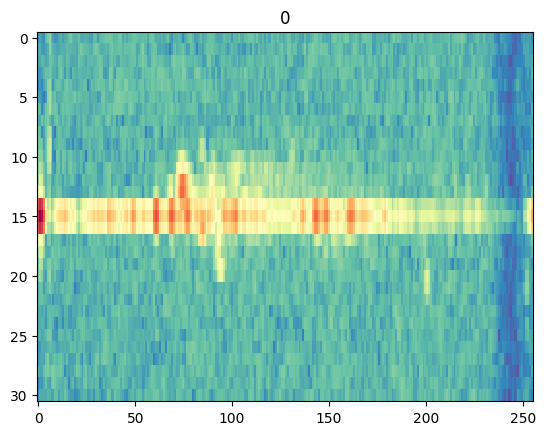

(31, 256)


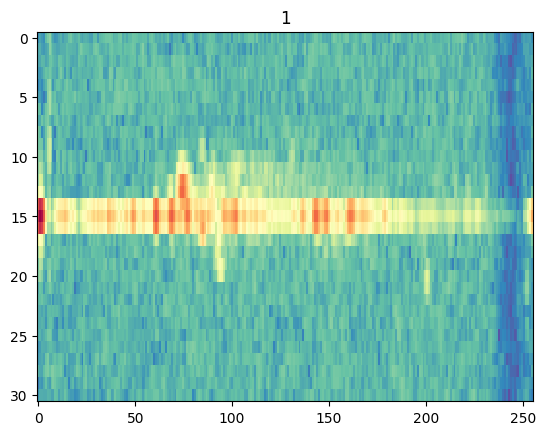

(31, 256)


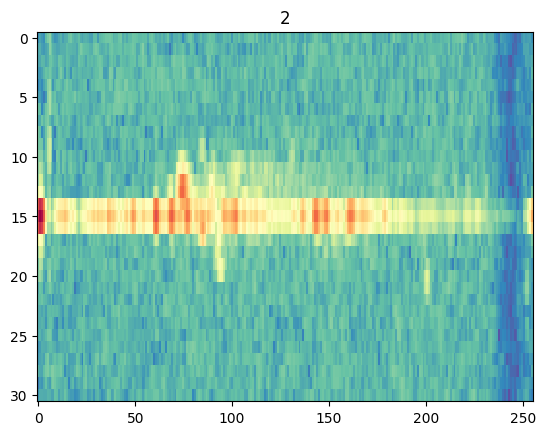

(31, 256)


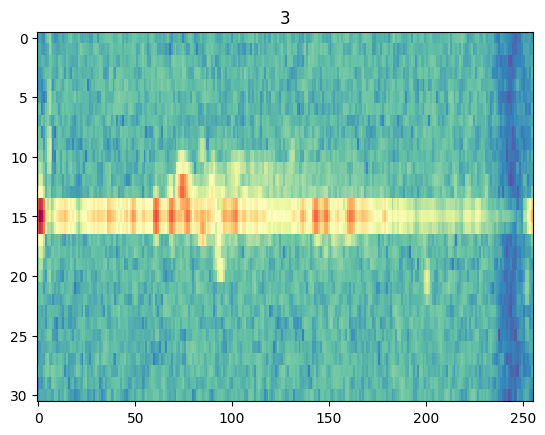

(256, 31)


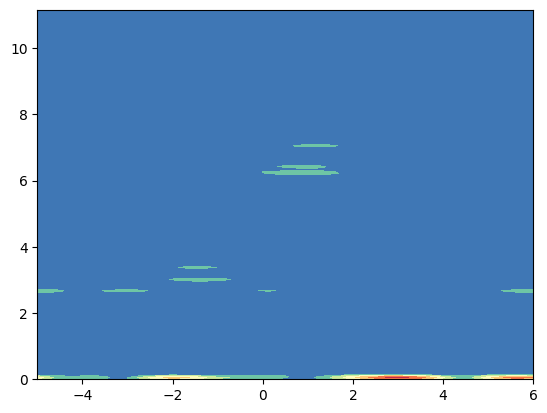

In [65]:
import scipy.interpolate as spi
# Print an input of each type
count = 0
print_idx = 15
range_res = 0.0436    

# Doppler heatmap printing
x_traint = x_train_dop[NUMBER_ROWS_DOP*print_idx:NUMBER_ROWS_DOP*(print_idx+1),:,:].reshape(
                          NUMBER_ROWS_DOP,
                          NUMBER_COLUMNS_DOP,
                          DEPTH)
print(x_traint.shape)
for x in range(0,4,1):
    f = x_traint[:,:,x]
    print(f.shape)
    # read the csv file
    plt.imshow(f, cmap='Spectral_r', interpolation='nearest', aspect='auto')
    plt.title(count)
    plt.show()
    count+=1


# Azimuth heatmap plotting
x_traina = x_train_az[NUMBER_ROWS_AZ*print_idx:NUMBER_ROWS_AZ*(print_idx+1),:].reshape(
                          NUMBER_ROWS_AZ,
                          NUMBER_COLUMNS_AZ)

print(x_traina.shape)
range_bins = x_traina.shape[0]
angle_bins = x_traina.shape[1]
theta = np.arcsin(np.linspace(-angle_bins / 2 + 1, angle_bins / 2 - 1, angle_bins) * (2 / angle_bins))  # Angular linear space for plotting
range = np.linspace(0, range_bins - 1, range_bins) * range_res                                          # Range linear space for plotting
range = np.maximum(range,0)                                                                                 # Keep only positive range value (later add range bias correction)
range_depth = range_bins * range_res                                                         
range_width, grid_res = range_depth/2, 64

# Grid construction
posX = np.outer(range, np.sin(theta))
posY = np.outer(range, np.cos(theta))
xlin = np.linspace(-np.floor(range_width), np.ceil(range_width), angle_bins)
ylin = np.linspace(0, range_depth, range_bins)
xgrid, ygrid = np.meshgrid(xlin, ylin)
ra_grid = spi.griddata((posX.flatten(), posY.flatten()), x_traina.flatten(),(xgrid, ygrid), method='cubic')
grid_init = 1
    
hmplot = plt.contourf(xlin,ylin,x_traina,cmap='Spectral_r')
plt.show()